In [1]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("gender_submission.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train.shape ,test.shape

((891, 12), (418, 11))

In [7]:
data = pd.concat([train,test])

In [8]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
data.shape

(1309, 12)

In [10]:
data.duplicated().sum()

0

In [11]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
data.isna().sum()/data.shape[0]

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [13]:
data = data.drop(columns="Cabin")
data = data.reset_index(drop=True)

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [15]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


<AxesSubplot:>

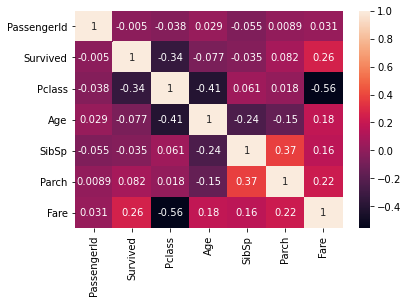

In [16]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

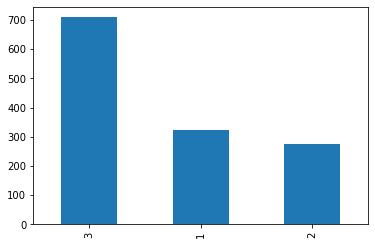

In [17]:
data['Pclass'].value_counts().plot(kind = "bar")

<AxesSubplot:>

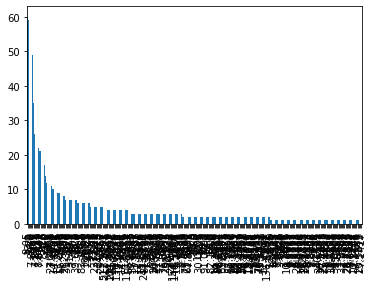

In [18]:
data['Fare'].value_counts().plot(kind = "bar")

In [25]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [26]:
data['PassengerId'].value_counts()

1309    1
449     1
431     1
432     1
433     1
       ..
874     1
875     1
876     1
877     1
1       1
Name: PassengerId, Length: 1309, dtype: int64

In [27]:
data['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [28]:
data['Survived'].isna().sum()

418

In [29]:
data['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [30]:
data['Name'].value_counts()

Connolly, Miss. Kate                             2
Kelly, Mr. James                                 2
Cook, Mr. Jacob                                  1
Kink, Miss. Maria                                1
Daher, Mr. Shedid                                1
                                                ..
Karlsson, Mr. Einar Gervasius                    1
del Carlo, Mrs. Sebastiano (Argenia Genovesi)    1
Mannion, Miss. Margareth                         1
Mulvihill, Miss. Bertha E                        1
Gustafsson, Mr. Johan Birger                     1
Name: Name, Length: 1307, dtype: int64

In [31]:
data['Age'].value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
76.00     1
22.50     1
74.00     1
80.00     1
0.67      1
Name: Age, Length: 98, dtype: int64

In [32]:
data['Age'].isna().sum()

263

In [33]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [34]:
data['Age'].isna().sum()

0

In [35]:
data['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [36]:
data['Sex']=data['Sex'].replace({"male":0,"female":1})

In [37]:
data['Sex'].value_counts()

0    843
1    466
Name: Sex, dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 112.6+ KB


In [39]:
data['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [40]:
data['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [41]:
data['Ticket'].value_counts()

CA. 2343    11
CA 2144      8
1601         8
PC 17608     7
3101295      7
            ..
113044       1
2658         1
PC 17482     1
349224       1
244278       1
Name: Ticket, Length: 929, dtype: int64

In [42]:
data['Fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64

In [43]:
data['Fare'].isna().sum()

1

In [44]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mode()[0])

In [45]:
data['Fare'].isna().sum()

0

In [46]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [47]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [48]:
data['Embarked'].isna().sum()

0

In [49]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [52]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.025731,-0.055224,0.008942,0.031029
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.070323,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.366371,0.060832,0.018322,-0.558740
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.057397,0.109609,0.213125,0.185744
Age,0.025731,-0.070323,-0.366371,-0.057397,1.000000,-0.190747,-0.130872,0.170619
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.190747,1.000000,0.373587,0.160388
Parch,0.008942,0.081629,0.018322,0.213125,-0.130872,0.373587,1.000000,0.221668
Fare,0.031029,0.257307,-0.558740,0.185744,0.170619,0.160388,0.221668,1.000000


In [53]:
data_preprocessed = data.drop(columns=["Ticket"])

In [54]:
data_preprocessed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,29.881138,0,0,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",0,29.881138,0,0,8.0500,S


In [55]:
data.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [63]:
train_preprocessed =data_preprocessed[data_preprocessed['Survived'].notna()]

In [64]:
test_preprocessed = data_preprocessed[data_preprocessed['Survived'].isna()]

In [65]:
train_preprocessed.to_csv("train_preprocessed.csv", index = False)
test_preprocessed.to_csv("test_preprocessed.csv", index = False)


In [66]:
train_preprocessed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.881138,1,2,23.4500,S
889,890,1.0,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,C


In [67]:
test_preprocessed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,"Kelly, Mr. James",0,34.500000,0,0,7.8292,Q
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,7.0000,S
893,894,NaN,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,9.6875,Q
894,895,NaN,3,"Wirz, Mr. Albert",0,27.000000,0,0,8.6625,S
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,29.881138,0,0,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",0,29.881138,0,0,8.0500,S
